# 10. Metrike učinkovitosti in tehnike vrednotenja

(pripravil Gjorgji Noveski, IJS, Slovenija)

Vrednotenje algoritma strojnega učenja je bistven del vsakega projekta. V tem poglavju bomo obravnavali standardne metrike in tehnike za vrednotenje danega modela. Začnimo z uvozom običajnih paketov strojnega učenja.

In [ ]:
import pandas
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, roc_curve, auc, RocCurveDisplay
np.random.seed(41)

V tem primeru si bomo ogledali en običajen nabor podatkov, in sicer za vrsto cvetov irisa. Vsebuje podatke o treh vrstah cvetov irisa: Iris-setosa, Iris-virginica in Iris-versicolor. Ima 4 atribute, ki predstavljajo dimenzije delov cveta.

In [ ]:
flower_dataset = pandas.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/10/iris.csv')
flower_dataset.drop('Id', axis=1, inplace=True)

In [ ]:
flower_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Za usposabljanje modela strojnega učenja podatke razdelimo na nabor podatkov za učenje in testiranje. Ciljna spremenljivka je stolpec "Vrsta", medtem ko bodo ostali 4 stolpci vhodni podatki za model.

In [ ]:
x = flower_dataset.iloc[:, :-1]
y = flower_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

## 10.1. Model

Model, ki ga bomo uporabili za usposabljanje in napovedovanje tipov irisa, je **metoda podpornih vektorjev**.

In [ ]:
model = SVC(random_state=42, probability=True)
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

### 10.1.1. Generiranje matrike zmede

Matrika zmede je eno od orodij, ki nam pomaga ugotoviti, kako dobro deluje model. Je dvodimenzionalna, ena os predstavlja napovedani razred, druga os pa dejanski pravi razred. Iz nje se lahko naučimo veliko stvari in izpeljemo naslednje metrike:
- Pravi pozitivni
- Lažno pozitiven
- Pravi negativni
- Lažno negativen

Te metrike nam povedo, ali je bil vzorec podatkov pravilno ali napačno razvrščen v pozitivni ali negativni razred. Vizualno lahko bolje razumemo, kako deluje.

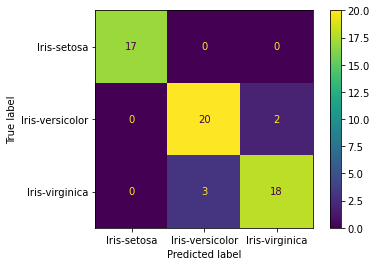

In [ ]:
matrix = confusion_matrix(y_test, y_predicted)
display = ConfusionMatrixDisplay(matrix, display_labels=model.classes_)
display.plot()

## 10.2. Metrike

Za merjenje uspešnosti modela strojnega učenja (klasifikatorja) lahko uporabimo veliko različnih metrik. Na prvi pogled lahko dajejo podobne ali enake rezultate. Toda glede na problem, ki ga obravnavamo, in podatke so nekatere metrike primernejše od drugih. V naslednjih delih bomo razložili in prikazali različne metrike, ki jih lahko uporabimo pri merjenju uspešnosti modela strojnega učenja. Pomembno je, da razumemo razlike med metrikami. Ko omenimo "pozitiven primer", imamo v mislih opazovanje podatkov, ki pripada ciljnemu razredu, ki ga želimo napovedati. Če imamo na primer problem klasifikacije slik in moramo razvrstiti, ali slika vsebuje mačko, potem tiste slike, ki vsebujejo mačko, imenujemo "pozitivni primeri", tiste, ki je ne vsebujejo, pa "negativni primeri".

## 10.3. Točnost

Metrika točnosti upošteva vse napovedi modela in predstavlja delež napovedi, ki jih je model pravilno izvedel. Pri nalogi binarne klasifikacije je točnost delež pravilnih napovedi **med vsemi napovedmi**. Pomembno je razumeti, da v našem primeru, ko imamo opravka z naborom podatkov o cvetovih, napoved, da je cvet vrste Iris-setosa, medtem ko je dejansko vrsta cvet Iris-Virginica, vpliva na to metriko.

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_predicted)

In [ ]:
accuracy

0.9166666666666666

### 10.3.1. Stroškovno občutljiva točnost

Druga vrsta metrike točnosti je točnost, občutljiva na stroške.

V nekaterih primerih imamo v naši zbirki podatkov zelo malo vzorcev podatkov ciljnega razreda v primerjavi z drugim razredom. Če želimo na primer razvrstiti, ali ima bolnik raka ali ne, imamo morda nabor podatkov, ki ga sestavlja le 100 vzorcev z bolniki, ki imajo raka, in 900 vzorcev brez njega. V teh primerih želimo algoritmu povedati, da je pomembneje, da lahko izbere bolnike z rakom, in da bi morala biti za napačno razvrstitev teh bolnikov višja kazen. To je posledica uporabe stroškovno občutljive natančnosti. Vzorcem podatkov dodelimo uteži, večje uteži vzorcem, ki so za nas pomembni in jih želimo razvrstiti.

In [ ]:
model = SVC(random_state=42, probability=True, class_weight='balanced')
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

Tu model treniramo z uporabo stroškovno občutljive točnosti z dodatnim parametrom "**razredna_utež**". Vrednost "uravnotežen" samodejno dodeli uteži razredom, ki so obratno sorazmerne s frekvencami razredov.

## 10.4. Točnost

Točnost kot metrika upošteva le en razred hkrati. Njen cilj je ugotoviti, koliko naših napovedi za določen razred je dejansko pravilnih. Z drugimi besedami, točnost je delež pravilnih napovedi **med pozitivnimi <u>napovedmi</u>**.
V našem scenariju ne moremo uporabiti metrike točnosti, če želimo povedati, kako dobro je model deloval v vseh razredih tipov cvetpv, lahko pa uporabimo točnost, če želimo povedati, kako dobro je deloval v vsakem razredu posebej.

In [ ]:
precision = precision_score(y_true=y_test, y_pred=y_predicted, average=None)

In [ ]:
precision

array([1.        , 0.86956522, 0.9       ])

## 10.5. Priklic

Priklic je enak kot natančnost, vendar upošteva le en razred naenkrat. Priklic uporabimo, kadar želimo preveriti, kako dobro naš model zazna ciljni razred. Odpoklic je delež pravilnih napovedi **med pozitivnimi <u>primeri</u>**. Ko rečemo pozitivni primeri, mislimo na ciljni razred za naš problem.

In [ ]:
recall = recall_score(y_true=y_test, y_pred=y_predicted, average=None)
recall

array([1.        , 0.90909091, 0.85714286])

## 10.6. ROC krivulja

Krivulja ROC (Receiver Operating Characteristic) ocenjuje kakovost klasifikatorja, ko ta izpisuje verjetnosti. Na primer, namesto da bi klasifikator izpisal strogo 1 ali 0, če vzorec pripada ciljnemu razredu ali ne, mora napovedati določeno verjetnost, da vzorec pripada ciljnemu razredu. Običajno je razpon verjetnosti od 0,0 (0 % verjetnost) do 1,0 (100 % verjetnost).

Ko imamo verjetnosti, določimo prag, ki določa, od katere verjetnosti naprej so vsi napovedani vzorci razvrščeni v ciljni razred, drugi pa ne. S spreminjanjem te mejne vrednosti se spreminja število pozitivnih in negativnih primerov. Če določimo visok prag, na primer 0,9, bomo dobili manjše število pozitivnih primerov, vendar bomo bolj prepričani, da gre za pravilno napoved. Podobno, če nastavimo nizek prag, bomo bolj prepričani, da smo pravilno določili večje število pozitivnih vzorcev, vendar bo tudi veliko negativnih vzorcev nepravilno razvrščenih.

Krivulja ROC nam pomaga poiskati vrednost praga, ki bo za nas najboljša.

Ker metrika ROC obravnava le največ dva razreda (pozitivni in negativni razred), bomo morali odstraniti enega od treh razredov, ki jih imamo v našem naboru podatkov o šarenici. Odstranili bomo primere "Iris-setosa", zdaj pa bomo ugotovili, ali je primer iz vrste "Iris-versicolor".

In [ ]:
two_class_dataset = flower_dataset[flower_dataset['Species'] != "Iris-setosa"].copy()
two_class_dataset['Species'] = np.where(two_class_dataset['Species'] == 'Iris-versicolor', 1, 0)

In [ ]:
x = two_class_dataset.iloc[:, :-1]
y = two_class_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

Vrnjene so verjetnosti za oba razreda, ker pa sta oba razreda enaka 1, lahko vzamemo samo ciljni razred, ki nas zanima.

In [ ]:
model.fit(x_train, y_train)
y_predicted = model.predict_proba(x_test)[:,1]

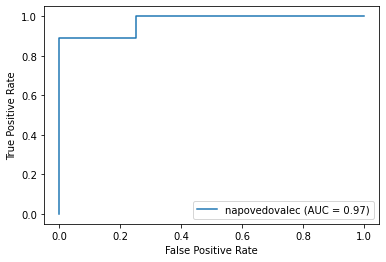

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='napovedovalec')
display.plot()

## 10.7. Prečno preverjanje

V resničnem svetu samo usposabljanje in testiranje klasifikatorja na naboru podatkov ne zadostuje za zagotovitev, da bo uspešnost, ki jo vidimo na podlagi metrik, tudi takšna, kot jo bomo dosegli. Obstaja možnost, da smo imeli srečo, ko je funkcija za razdelitev podatkov za usposabljanje/testiranje razdelila naše podatke. Če želimo biti bolj prepričani o sposobnosti modela za obdelavo novih in nevidenih podatkov, ga lahko večkrat preverimo in izberemo čas, ko se je najbolje odrezal. To se imenuje prečno preverjanje.

K-kratno prečno preverjanje razdeli nabor podatkov na **k** več manjših naborov podatkov, od katerih je eden namenjen učenju, drugi pa preverjanju, in sicer k-krat. Po končanem usposabljanju in potrjevanju shrani rezultate potrjevanja in ponovno izvede enako, vendar zdaj z različnimi podatki, ki so vključeni v nabor podatkov za učenje in potrjevanje. Na ta način bodo vsi podatki imeli priložnost sodelovati pri učenju in potrjevanju.

Ko nabor podatkov razdelimo na nabor podatkov za učenje in preverjanje, moramo biti prepričani, da bomo del prvotnega nabora podatkov pustili za testiranje. Ti podatki za testiranje ne bodo del cikla navzkrižnega potrjevanja, saj želimo po izbiri klasifikatorja, ki se je najbolje izkazal med k iteracijami, testirati na njem, da dobimo nepristransko oceno končne uspešnosti modela.

In [ ]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [ ]:
print("Točnost %0.2f s standardnim odklonom %0.2f" % (scores.mean(), scores.std()))

Točnost 0.93 s standardnim odklonom 0.08


In [ ]:
scores = cross_val_score(model, x_train, y_train, cv=11)

In [ ]:
print("Točnost %0.2f s standardnim odklonom %0.2f" % (scores.mean(), scores.std()))

Točnost 0.96 s standardnim odklonom 0.07
